<a href="https://colab.research.google.com/github/amulyaojha11/Temperature-Prediction-of-Indian-Cities/blob/main/Data%20Preprocessing/Kolkata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA and Seasonal ARIMA
## Autoregressive Integrated Moving Averages

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('Kolkata.csv',index_col='Date' )

In [ ]:
df.head()

,Temperature
Date,
01-01-2009,20.6
01-02-2009,23.4
01-03-2009,27.4
01-04-2009,31.5
01-05-2009,29.9


In [ ]:
df.tail()

,Temperature
Date,
01-03-2019,26.6
01-04-2019,29.6
01-05-2019,30.9
01-06-2019,30.7
01-07-2019,30.1


In [ ]:
df.dropna(inplace=True)

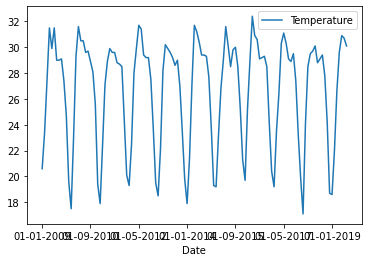

In [ ]:
df.plot()

## Testing for Stationarity



In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(dataset):
     dftest = adfuller(dataset)
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
     if dftest[1] <= 0.05:
        print("Data is stationary")
     else:
        print("Data is non-stationary ")
    
ad_test(df['Temperature'])

1. ADF :  -2.115860573953714
2. P-Value :  0.23818499542374683
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 113
5. Critical Values :
	 1% :  -3.489589552580676
	 5% :  -2.887477210140433
	 10% :  -2.580604145195395
Data is non-stationary 


## Differencing

In [ ]:
df['Seasonal First Difference']=df['Temperature']-df['Temperature'].shift(12)

In [ ]:
df.head()

,Temperature,Seasonal First Difference
Date,,
01-01-2009,20.6,NaN
01-02-2009,23.4,NaN
01-03-2009,27.4,NaN
01-04-2009,31.5,NaN
01-05-2009,29.9,NaN


In [ ]:
ad_test(df['Seasonal First Difference'].dropna())

1. ADF :  -2.6082158654837815
2. P-Value :  0.09131107652215531
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 101
5. Critical Values :
	 1% :  -3.4968181663902103
	 5% :  -2.8906107514600103
	 10% :  -2.5822770483285953
Data is non-stationary 


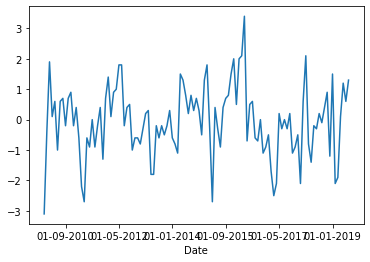

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
df['Seasonal Second Difference']=df['Seasonal First Difference']-df['Seasonal First Difference'].shift(12)

In [ ]:
df.head()

,Temperature,Seasonal First Difference,Seasonal Second Difference
Date,,,
01-01-2009,20.6,NaN,NaN
01-02-2009,23.4,NaN,NaN
01-03-2009,27.4,NaN,NaN
01-04-2009,31.5,NaN,NaN
01-05-2009,29.9,NaN,NaN


In [ ]:
ad_test(df['Seasonal Second Difference'].dropna())

1. ADF :  -3.821603927132006
2. P-Value :  0.0026938536506740094
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 90
5. Critical Values :
	 1% :  -3.505190196159122
	 5% :  -2.894232085048011
	 10% :  -2.5842101234567902
Data is stationary


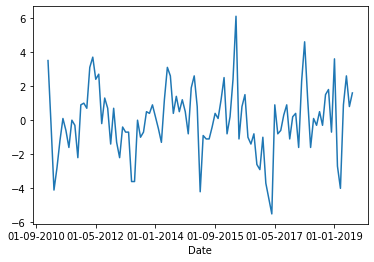

In [ ]:
df['Seasonal Second Difference'].plot()